In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

## Predicting sales price of bulldozer using ML model
A regression model will be used, will be following the same steps stating from definition followed by data
Data is downloaded from kaggle bluebook bulldozer data
The evalytion metriz  which will be used is root mean squared log error
for features it providesw a data dictionary conating all features of the dataset



In [8]:
## import training and validation dataset
import pandas as pd

df = pd.read_csv("C:/Users/megha sharma/Bulldozer-price-prediction-project/bluebook-for-bulldozers/bluebook-for-bulldozers/TrainAndValid.csv", low_memory=False)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [11]:
df.isna().sum()
## data contains missing values

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

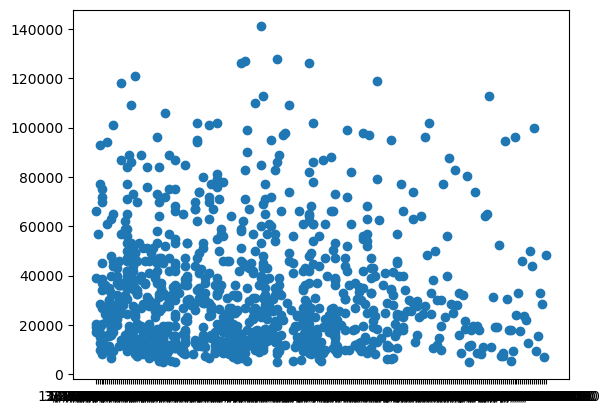

In [13]:
fig , ax = plt.subplots()
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000])
plt.show()

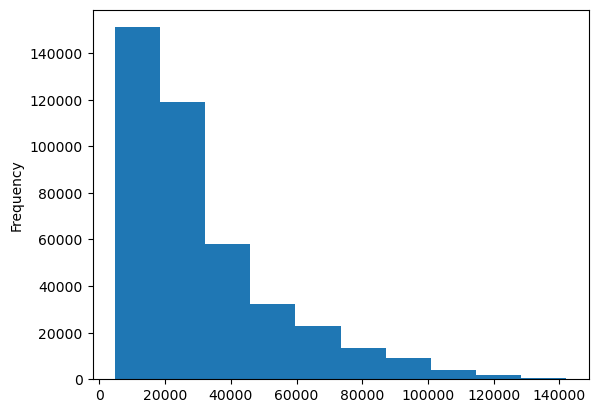

In [15]:
df.SalePrice.plot.hist()
plt.show()

## Parsing dates 
when we work with time series data we want to enrich the time and date component as much as possible , we can do that by telling panda which of our column has dates in it using PARSE-DATE parameter 

In [4]:
## what is datetime object in pandas
##When you use pd.to_datetime(), it converts your date column (which might just be plain text or strings) into actual datetime objects
## so that Pandas knows theyre real dates and can handle them smartly.
df = pd.read_csv("C:/Users/megha sharma/Bulldozer-price-prediction-project/bluebook-for-bulldozers/bluebook-for-bulldozers/TrainAndValid.csv"
                 , low_memory=False, parse_dates = ["saledate"])









In [6]:
df.saledate.dtype
##In pandas, the M8[ns] data type is shorthand for:datetime64[ns]

dtype('<M8[ns]')

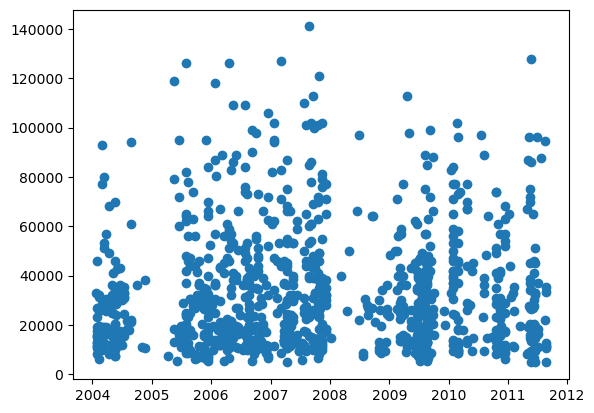

In [7]:
fig , ax = plt.subplots()
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000])
plt.show()

In [8]:
## to transpose we do
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [10]:
## sort dataframe by saledate
df.sort_values(by = ["saledate"] , inplace = True, ascending = True)
df["saledate"].head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [11]:
## lets make a copy of our dataframe
df_tmp = df.copy()

In [13]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


## add datetime parameters for saledate coulmn

In [14]:
## by datetime parameters we mmean we are going to provide more specification to our data in terms of year day , month and so on
df_tmp["saleyear"] =  df_tmp.saledate.dt.year
df_tmp["salemonth"] =  df_tmp.saledate.dt.month
df_tmp["saleday"] =  df_tmp.saledate.dt.day
df_tmp["saledayofweek"] =  df_tmp.saledate.dt.dayofweek
df_tmp["saledayofyear"] =  df_tmp.saledate.dt.dayofyear


In [16]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleyear,salemonth,saleday,saledayofweek,saledayofyear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31


In [17]:
## lets drop saledate column
df_tmp.drop("saledate", axis=1 , inplace = True)

In [18]:
## check value of diif  columns
df_tmp.state.value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Iowa               1336
Montana            1336
Oklahoma           1326
Nebraska            866
West Virgi

## Modelling 

In [ ]:
## we have to predict salesprice based on our features s o we will be using regression model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs = -1 , random_statw = 42)

model.fit(df_tmp.drop("SalePrice" , axis = 1), df_tmp["SalePrice"])

## but we cant directly do this as we hv so much missing value and object data



In [23]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   object  
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  object  
 12  fiModelSeries             58667 non-null   object  
 13  fiModelDescriptor         748

In [22]:
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

fiModelDesc
fiBaseModel
fiProductClassDesc
state
ProductGroup
ProductGroupDesc


In [26]:
## convert string to categories
## one way we can convert data to numbers is by converting them into pandas categories
## this will turn all the string value into category
## by label we are referring columns content is the content stored in them
for label, content in df_tmp.items():
    if pd.api.types.is_object_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()


In [27]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

In [28]:
df_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [29]:
df_tmp.state.cat.codes
## all categoreis hv been assigned a numerical value


205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [30]:
df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

In [31]:
df_tmp.to_csv("C:/Users/megha sharma/Bulldozer-price-prediction-project/bluebook-for-bulldozers/bluebook-for-bulldozers/TrainAndValid_tmp.csv" , index = False)

In [4]:
df_tmp = pd.read_csv("C:/Users/megha sharma/Bulldozer-price-prediction-project/bluebook-for-bulldozers/bluebook-for-bulldozers/TrainAndValid_tmp.csv", low_memory = False)

## fill missing values 

In [5]:
## letsw fill first numeric missing values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)
        

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleyear
salemonth
saleday
saledayofweek
saledayofyear


In [6]:
df_tmp.ModelID
## modelid is unique identifier for each model

0          8434
1         10150
2          4139
3          8591
4          4089
          ...  
412693     5266
412694    19330
412695    17244
412696     3357
412697     4701
Name: ModelID, Length: 412698, dtype: int64

In [7]:
## check which numeric cloumn has null values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [10]:
## fill numeric rows missing values with median
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            ## add a binary column  which tells us if the data was missing
            df_tmp[label +"_is_missing"] = pd.isnull(content)
            ##Assigns a Boolean Series to that new column
            ##pd.isnull(content)
            ## fill missing values with numeric data
            df_tmp[label] = content.fillna(content.median())

In [11]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [12]:
df_tmp.dtypes

SalesID                                 int64
SalePrice                             float64
MachineID                               int64
ModelID                                 int64
datasource                              int64
auctioneerID                          float64
YearMade                                int64
MachineHoursCurrentMeter              float64
UsageBand                              object
fiModelDesc                            object
fiBaseModel                            object
fiSecondaryDesc                        object
fiModelSeries                          object
fiModelDescriptor                      object
ProductSize                            object
fiProductClassDesc                     object
state                                  object
ProductGroup                           object
ProductGroupDesc                       object
Drive_System                           object
Enclosure                              object
Forks                             

In [13]:
df_tmp.isna().sum()

SalesID                                    0
SalePrice                                  0
MachineID                                  0
ModelID                                    0
datasource                                 0
auctioneerID                               0
YearMade                                   0
MachineHoursCurrentMeter                   0
UsageBand                             339028
fiModelDesc                                0
fiBaseModel                                0
fiSecondaryDesc                       140727
fiModelSeries                         354031
fiModelDescriptor                     337882
ProductSize                           216605
fiProductClassDesc                         0
state                                      0
ProductGroup                               0
ProductGroupDesc                           0
Drive_System                          305611
Enclosure                                334
Forks                                 214983
Pad_Type  

In [17]:
## turn categorial values into numbers and fill missing
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
         df_tmp[label +"_is_missing"] = pd.isnull(content)

         df_tmp[label] = pd.Categorical(content).codes +1
       
           

In [18]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 77.9 MB


In [19]:
df_tmp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

## now it can be seen our data has no missing values tadaaaa and our data is all numeric

## modelling 

In [20]:

%%time
##The %%time Jupyter cell magic measures how long the entire cell takes to run.
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs = -1 , random_state = 42)

model.fit(df_tmp.drop("SalePrice" , axis = 1), df_tmp["SalePrice"])




CPU times: total: 44min 13s
Wall time: 15min 27s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [22]:
## score the model
model.score( df_tmp.drop("SalePrice" , axis = 1), df_tmp["SalePrice"])
## model.score() for regressors returns the coefficient of determination a measure of how well the model fits the data.

0.9875468079970562

## question : why isnt this metric hold water( why isnt it is reliable)

In [23]:
## lets split datta into trainging and validation set
df_vad = df_tmp[df_tmp.saleyear == 2012]
df_train = df_tmp[df_tmp.saleyear!=2012]

len(df_vad) , len(df_train)

(11573, 401125)

In [48]:
x_train,y_train = df_train.drop("SalePrice" , axis =1) , df_train.SalePrice
x_vad, y_vad = df_vad.drop("SalePrice" , axis =1) , df_vad.SalePrice


In [49]:
len(x_vad), len(y_vad)

(11573, 11573)

In [40]:
len(x_train)

401125

In [50]:
train_preds = model.predict(x_train)
vad_preds = model.predict(x_vad)

In [51]:
len(y_vad), len(vad_preds)

(11573, 11573)

## BUILDING AN EVALUTION FUNCTION 

In [52]:
## CREATE EVAUTION FUNCTION
from sklearn.metrics import mean_absolute_error, mean_squared_log_error, r2_score
import numpy as np

def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

def show_scores(model):
    train_preds = model.predict(x_train)
    vad_preds = model.predict(x_vad)
    scores = {
        "Training MAE": mean_absolute_error(y_train, train_preds),
        "Validation MAE": mean_absolute_error(y_vad, vad_preds),
        "Training RMSLE": rmsle(y_train, train_preds),
        "Validation RMSLE": rmsle(y_vad, vad_preds),
        "Training R²": r2_score(y_train, train_preds),
        "Validation R²": r2_score(y_vad, vad_preds)
    }
    return scores


## Testing our model on a subset (to tune hyperparameters

In [29]:
%%time
##The %%time Jupyter cell magic measures how long the entire cell takes to run.
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs = -1 , random_state = 42, max_samples=10000)


CPU times: total: 0 ns
Wall time: 12.6 ms


In [32]:
%%time
model.fit(x_train,y_train)

CPU times: total: 1min 41s
Wall time: 34 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [53]:
show_scores(model)

{'Training MAE': 5561.2988092240585,
 'Validation MAE': 7177.26365505919,
 'Training RMSLE': np.float64(0.257745378256977),
 'Validation RMSLE': np.float64(0.29362638671089003),
 'Training R²': 0.8606658995199189,
 'Validation R²': 0.8320374995090507}

## tuning with rndomizedsearchCV 

In [62]:
%%time

from sklearn.model_selection import RandomizedSearchCV

rf_grid = { "n_estimators" : np.arange(10,100,10),
           "max_depth" : [None ,  3 , 5 , 10],
           "min_samples_split" : np.arange(2,20,2),
           "min_samples_leaf" : np.arange(1,20,2),
           "max_features" : [0.5,1,"sqrt" , "log2" ],
           "max_samples" : [10000]
}
rs_model =  RandomizedSearchCV(  RandomForestRegressor(n_jobs = -1 , random_state = 42), param_distributions = rf_grid, 
                               n_iter = 2,
                               cv = 5,
                               verbose =True)

rs_model.fit(x_train,y_train)


Fitting 5 folds for each of 2 candidates, totalling 10 fits
CPU times: total: 24.9 s
Wall time: 15.2 s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'log2'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [63]:
rs_model.best_params_

{'n_estimators': np.int64(80),
 'min_samples_split': np.int64(8),
 'min_samples_leaf': np.int64(3),
 'max_samples': 10000,
 'max_features': 'log2',
 'max_depth': 10}

In [64]:
show_scores(rs_model)

{'Training MAE': 9851.643877078985,
 'Validation MAE': 11429.46067988738,
 'Training RMSLE': np.float64(0.43150269848509293),
 'Validation RMSLE': np.float64(0.450847335670207),
 'Training R²': 0.6263107388273469,
 'Validation R²': 0.6314635200132214}

In [69]:
## train the model with best hyperparametrs

ideal_model = RandomForestRegressor(n_estimators = 40 , min_samples_leaf = 1 , min_samples_split = 14 ,
                                    max_features = 0.5, n_jobs = -1, max_samples = None, random_state = 42)

## fit the ideal  model
ideal_model.fit(x_train , y_train)

RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1)

In [70]:
show_scores(ideal_model)

{'Training MAE': 2954.0198850767724,
 'Validation MAE': 5942.442370988656,
 'Training RMSLE': np.float64(0.14464465393743997),
 'Validation RMSLE': np.float64(0.2455044729086938),
 'Training R²': 0.9589417690142804,
 'Validation R²': 0.8821203438332004}

In [76]:
## it can be seen that this model offers best result so far
## so lets test out model on test dataset
## import the test datatest
df_test = pd.read_csv("C:/Users/megha sharma/Bulldozer-price-prediction-project/bluebook-for-bulldozers/bluebook-for-bulldozers/Test.csv", low_memory= False,
                     parse_dates = ["saledate"])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [80]:
## make predictions on the test dataset
##
## first we have to preprocess the data to get it int o same format as train dataset
def preprocess_dat(df):
    df["saleyear"] = df.saledate.dt.year
    df["salemonth"] = df.saledate.dt.month
    df["saleday"] = df.saledate.dt.day
    df["saledayofweek"] = df.saledate.dt.dayofweek
    df["saledayofyear"] = df.saledate.dt.dayofyear

    df.drop("saledate", axis=1, inplace=True)

    # fill the numeric rows with median and turn category to numbers
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # add a binary column  which tells us if the data was missing
                df[label + "_is_missing"] = pd.isnull(content)
                # fill missing values with numeric data
                df[label] = content.fillna(content.median())

        if not pd.api.types.is_numeric_dtype(content):
            df[label + "_is_missing"] = pd.isnull(content)
            df[label] = pd.Categorical(content).codes + 1
                
            

    return df


In [105]:
df_test = pd.read_csv("C:/Users/megha sharma/Bulldozer-price-prediction-project/bluebook-for-bulldozers/bluebook-for-bulldozers/Test.csv", low_memory= False,
                     parse_dates = ["saledate"])
df_test.head()
df_test = preprocess_dat(df_test)
df_test.head()
##


,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [106]:
x_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,True,True,True,True,True,False,False,False,True,True
1,1821514,1194089,10150,132,99.0,1980,0.0,0,1820,559,...,True,True,True,True,True,True,True,True,False,False
2,1505138,1473654,4139,132,99.0,1978,0.0,0,2348,713,...,True,True,True,True,True,False,False,False,True,True
3,1671174,1327630,8591,132,99.0,1980,0.0,0,1819,558,...,True,True,True,True,True,True,True,True,False,False
4,1329056,1336053,4089,132,99.0,1984,0.0,0,2119,683,...,True,True,True,True,True,False,False,False,True,True


In [107]:
## still our data differ so lets figure out where it differs
set(x_train.columns) - set(df_test.columns)

{'MachineHoursCurrentMeteris_missing', 'auctioneerIDis_missing'}

In [108]:
## adjust df_test
df_test["auctioneerIDis_missing"] = False
##df_test["MachineHoursCurrentMeteris_missing"] = False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerIDis_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


In [109]:
df_test.rename(columns={"MachineHoursCurrentMeter_is_missing": "MachineHoursCurrentMeteris_missing"}, inplace=True)


In [110]:
set(x_train.columns) - set(df_test.columns)

set()

In [111]:
df_test_aligned = df_test[x_train.columns]

In [112]:
# 1. Check if column names are identical
print((df_test.columns == x_train.columns).all())  # Should be True

# 2. Optional: print mismatches if any
print("Test extra cols:", set(df_test.columns) - set(x_train.columns))
print("Train extra cols:", set(x_train.columns) - set(df_test.columns))

# 3. Check exact order
print("Same column order?", list(df_test.columns) == list(x_train.columns))


False
Test extra cols: set()
Train extra cols: set()
Same column order? False


In [116]:
test_preds = ideal_model.predict(df_test_aligned)
test_preds

array([18098.80197004, 14944.27636227, 51427.59313189, ...,
       13330.4081988 , 17104.74946824, 24790.87033139], shape=(12457,))

In [118]:
## format prediction acc. to kaggle
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalePrice"] = test_preds
df_preds

,SalesID,SalePrice
0,1227829,18098.801970
1,1227844,14944.276362
2,1227847,51427.593132
3,1227848,68998.018805
4,1227863,60739.815686
...,...,...
12452,6643171,44979.775269
12453,6643173,12803.540470
12454,6643184,13330.408199
12455,6643186,17104.749468


In [119]:
## export prediction data
df_preds.to_csv("C:/Users/megha sharma/Bulldozer-price-prediction-project/bluebook-for-bulldozers/bluebook-for-bulldozers/Test_preditions.csv",
               index = False)

## FEATURES IMPORTANCE

In [122]:
ideal_model.feature_importances_

array([3.67676312e-02, 1.83653053e-02, 4.25995090e-02, 1.84363909e-03,
       3.32893086e-03, 1.94783023e-01, 3.03110060e-03, 9.75598124e-04,
       5.04336303e-02, 3.78446830e-02, 7.12774758e-02, 5.06484650e-03,
       1.67221530e-02, 1.58383568e-01, 4.38858476e-02, 5.99959915e-03,
       2.08386984e-03, 1.47689530e-03, 4.09253534e-03, 7.05943399e-02,
       4.49560482e-04, 4.29452631e-05, 8.26919675e-04, 1.66614944e-04,
       1.28951565e-03, 3.69080481e-05, 3.29911121e-04, 6.62861754e-03,
       4.36462044e-03, 1.14635534e-03, 4.48529756e-03, 3.63989518e-03,
       3.40233787e-03, 4.42697100e-04, 7.75167925e-04, 8.95333608e-03,
       8.55254024e-04, 1.22651676e-02, 1.54418880e-03, 1.16359186e-03,
       4.94075943e-04, 8.95655340e-04, 3.18558082e-03, 6.13222617e-04,
       4.77950033e-04, 3.60813396e-04, 2.11907193e-04, 2.03929619e-03,
       1.04130874e-03, 3.69700589e-04, 3.25367538e-04, 7.28826327e-02,
       3.75530462e-03, 5.72328353e-03, 2.92899020e-03, 9.78181507e-03,
      

In [123]:
## helper functions to plot feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features":  columns,
                        "feature_importances" : importances})
          .sort_values("feature_importances" , ascending = False)
          .reset_index(drop = True))
    ## plot the dataframe
    fig , ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Feature")
    ax.set_xlabel("Feature importance")

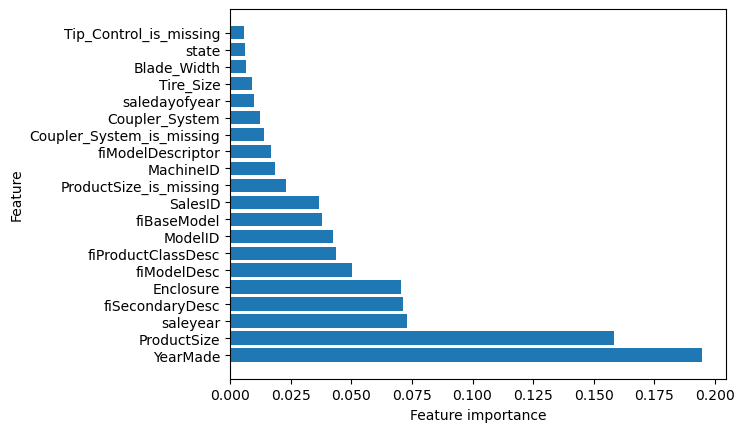

In [125]:
plot_features(x_train.columns, ideal_model.feature_importances_)